In [1]:
import numpy as np

## Numpy array vs Python list

In [3]:
a= [i for i in range(10000000)]
b= [i for i in range(10000000, 20000000)]
c=[]
import time
start= time.time()
for i in range(len(a)):
    c.append(a[i]+b[i])
print(time.time()-start)

1.3413429260253906


In [9]:
a=np.arange(10000000)
b=np.arange(10000000, 20000000)
start= time.time()
c=a+b
print(time.time()-start)

0.015581130981445312


In [10]:
1.34/0.015

89.33333333333334

In [11]:
#memory
a= [i for i in range(10000000)]

import sys
sys.getsizeof(a) #bytes

89095160

In [14]:
a=np.arange(10000000, dtype=np.int32)
sys.getsizeof(a) #bytes

40000112

In [16]:
89095160/40000112

2.2273727633562626

## Advanced Indexing

In [22]:
a=np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [23]:
#Fancy Indexing
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [25]:
#Boolean Indexing
a=np.random.randint(1,100,24).reshape(6,4)
a

array([[52, 54,  9, 33],
       [85, 21, 50, 16],
       [81, 85, 81, 12],
       [29, 83, 92,  9],
       [85, 73, 79, 35],
       [83, 67, 94, 38]])

In [26]:
a>50

array([[ True,  True, False, False],
       [ True, False, False, False],
       [ True,  True,  True, False],
       [False,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True, False]])

In [27]:
a[a>50]

array([52, 54, 85, 81, 85, 81, 83, 92, 85, 73, 79, 83, 67, 94])

In [28]:
#find out even numbers from the array
a[a%2==0]

array([52, 54, 50, 16, 12, 92, 94, 38])

In [31]:
#numbers greater than 50 and even also
a[(a%2==0)& (a>50)]

array([52, 54, 92, 94])

In [32]:
#numbers not divisible by 7
a[~(a%7==0)]

array([52, 54,  9, 33, 85, 50, 16, 81, 85, 81, 12, 29, 83, 92,  9, 85, 73,
       79, 83, 67, 94, 38])

## Broadcasting
The term broadcasting describe how numpy treats arrays with different shapes during arithmetic operations.
The smaller array is "broadcast" across the larger array so that the have compatible shapes 

In [34]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [33]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


## Broadcasting Rules
### 1. Make the two arrays have the same number of dimensions.

> If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

### 2. Make each dimension of the two arrays the same size.

> If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.

>If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.


In [35]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [36]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [37]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [38]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [39]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [40]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [41]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

## Working with Mathematical  Formulas

In [42]:
a=np.arange(10)
a.sum()

45

In [43]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [46]:
#sigmoid
def sigmoid(array):
    return (1/(1+np.exp(-(array))))

a=np.arange(100)
sigmoid(a)           

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [52]:
#mean squared error
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

def mse(actual,predicted):
    return np.mean((actual - predicted)**2)

mse(actual,predicted)

595.44

## Working with missing values

In [53]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [54]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

## Plotting Graphs

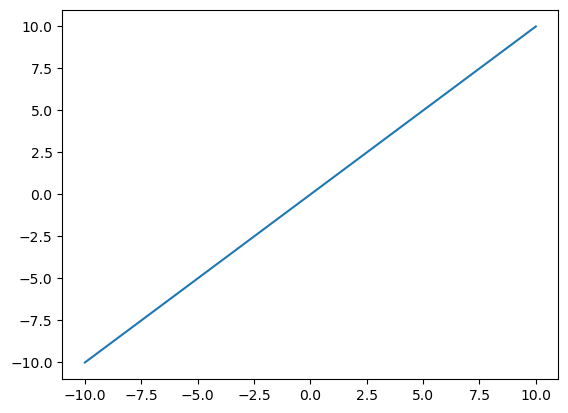

In [55]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

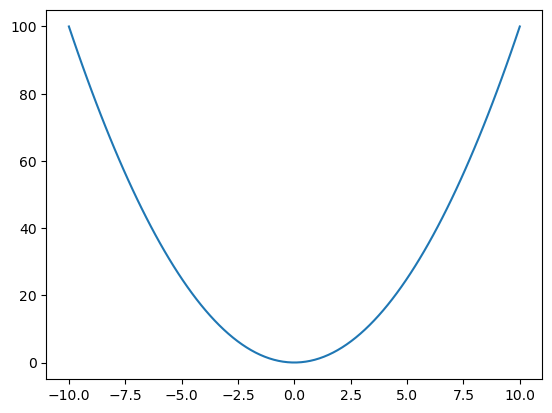

In [56]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

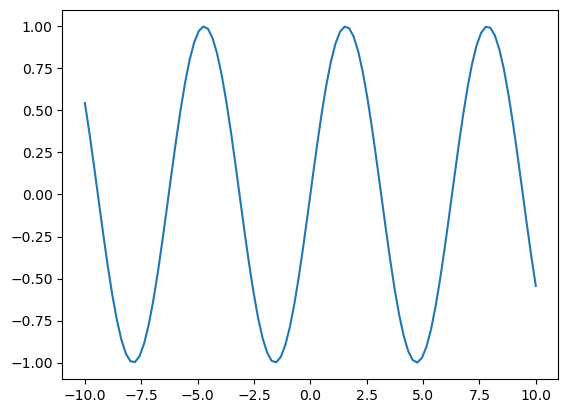

In [57]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

/var/folders/kr/9v50g3yd5zb_f0q99wrxsxl80000gn/T/ipykernel_8680/2564014901.py:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


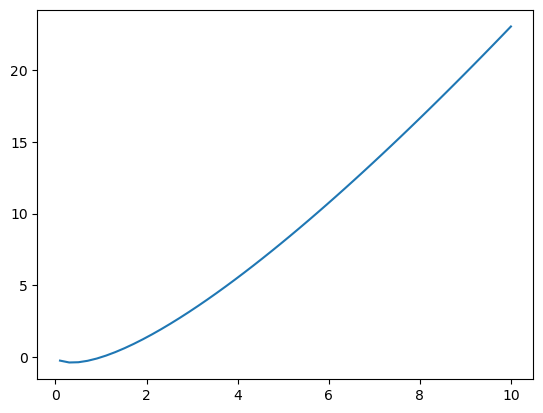

In [58]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

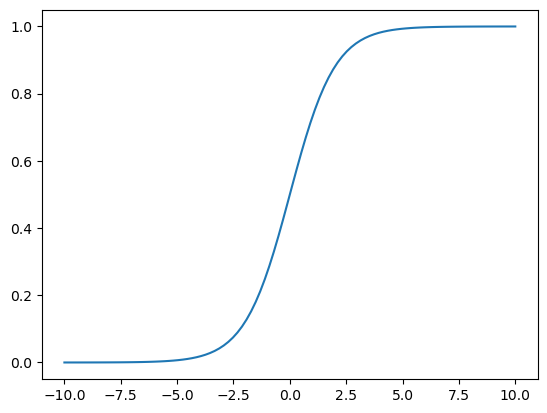

In [59]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)